In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [43]:
file_id = '1xT-z6iGBwpWYABzrBHWFUFmncuFoTVFp' #-- Updated File ID for my zip
file_obj = drive.CreateFile({'id': file_id})
file_obj.GetContentFile('Finance_Data_Exc.zip') 

In [ ]:
from zipfile import ZipFile
zip = ZipFile('Finance_Data_Exc.zip')
zip.namelist()

In [45]:
csvfile = zip.open('Finance_Data_Exc/PART_II_Financial_Data/SP500_TR.csv')
csvfile

<zipfile.ZipExtFile name='Finance_Data_Exc/PART_II_Financial_Data/SP500_TR.csv' mode='r' compress_type=deflate>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [47]:
SP500 = pd.read_csv(csvfile, parse_dates = ["Date"], index_col= "Date")

In [48]:
SP500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1988-12-30,288.12,288.12,288.12,288.12,288.12,0
1989-01-03,285.65,285.65,285.65,285.65,285.65,0
1989-01-04,289.99,289.99,289.99,289.99,289.99,0
1989-01-05,290.61,290.61,290.61,290.61,290.61,0
1989-01-06,291.29,291.29,291.29,291.29,291.29,0
...,...,...,...,...,...,...
2018-12-21,4899.41,4976.56,4787.04,4802.51,4802.51,0
2018-12-24,4770.95,4790.00,4672.66,4672.66,4672.66,0
2018-12-26,4696.63,4904.61,4664.09,4904.49,4904.49,0


In [49]:
SP500 = SP500.Close.to_frame()

In [50]:
SP500

,Close
Date,
1988-12-30,288.12
1989-01-03,285.65
1989-01-04,289.99
1989-01-05,290.61
1989-01-06,291.29
...,...
2018-12-21,4802.51
2018-12-24,4672.66
2018-12-26,4904.49


In [51]:
#Converting to annual freq

SP500 = SP500.resample("A", kind="period").last()

In [52]:
SP500

,Close
Date,
1988,288.12
1989,379.41
1990,367.63
1991,479.63
1992,516.18
1993,568.20
1994,575.71
1995,792.04
1996,973.90


In [53]:
# We use log values to calculate the Anual retruns Triangle

annual_ret = np.log(SP500/SP500.shift()).dropna()

In [54]:
annual_ret.columns = ["Return"]
annual_ret.head()

,Return
Date,
1989,0.275240
1990,-0.031540
1991,0.265938
1992,0.073441
1993,0.096018


In [58]:
windows = [year for year in range(annual_ret.index.size, 0, -1)]

In [59]:
windows  #30 years list created

[30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

In [60]:
for year in windows:
  annual_ret["{}Y".format(year)] = annual_ret.Return.rolling(year).mean()

In [61]:
annual_ret #30 new columns are created

,Return,30Y,29Y,28Y,27Y,26Y,25Y,24Y,23Y,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,14Y,13Y,12Y,11Y,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1989,0.275240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275240
1990,-0.031540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121850,-0.031540
1991,0.265938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169879,0.117199,0.265938
1992,0.073441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145770,0.102613,0.169689,0.073441
1993,0.096018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135819,0.100964,0.145132,0.084729,0.096018
1994,0.013131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115371,0.083397,0.112132,0.060863,0.054574,0.013131
1995,0.319008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144462,0.122666,0.153507,0.125399,0.142719,0.166069,0.319008
1996,0.206697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152241,0.134670,0.162372,0.141659,0.158713,0.179612,0.262852,0.206697
1997,0.287903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167315,0.153824,0.180305,0.166033,0.184551,0.206684,0.271202,0.247300,0.287903


In [62]:
#Preparing dataframe for the returns triangle, we drop the Return column

triangle = annual_ret.drop(columns = ["Return"])

In [63]:
triangle

,30Y,29Y,28Y,27Y,26Y,25Y,24Y,23Y,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,14Y,13Y,12Y,11Y,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275240
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121850,-0.031540
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169879,0.117199,0.265938
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145770,0.102613,0.169689,0.073441
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135819,0.100964,0.145132,0.084729,0.096018
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115371,0.083397,0.112132,0.060863,0.054574,0.013131
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144462,0.122666,0.153507,0.125399,0.142719,0.166069,0.319008
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152241,0.134670,0.162372,0.141659,0.158713,0.179612,0.262852,0.206697
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167315,0.153824,0.180305,0.166033,0.184551,0.206684,0.271202,0.247300,0.287903


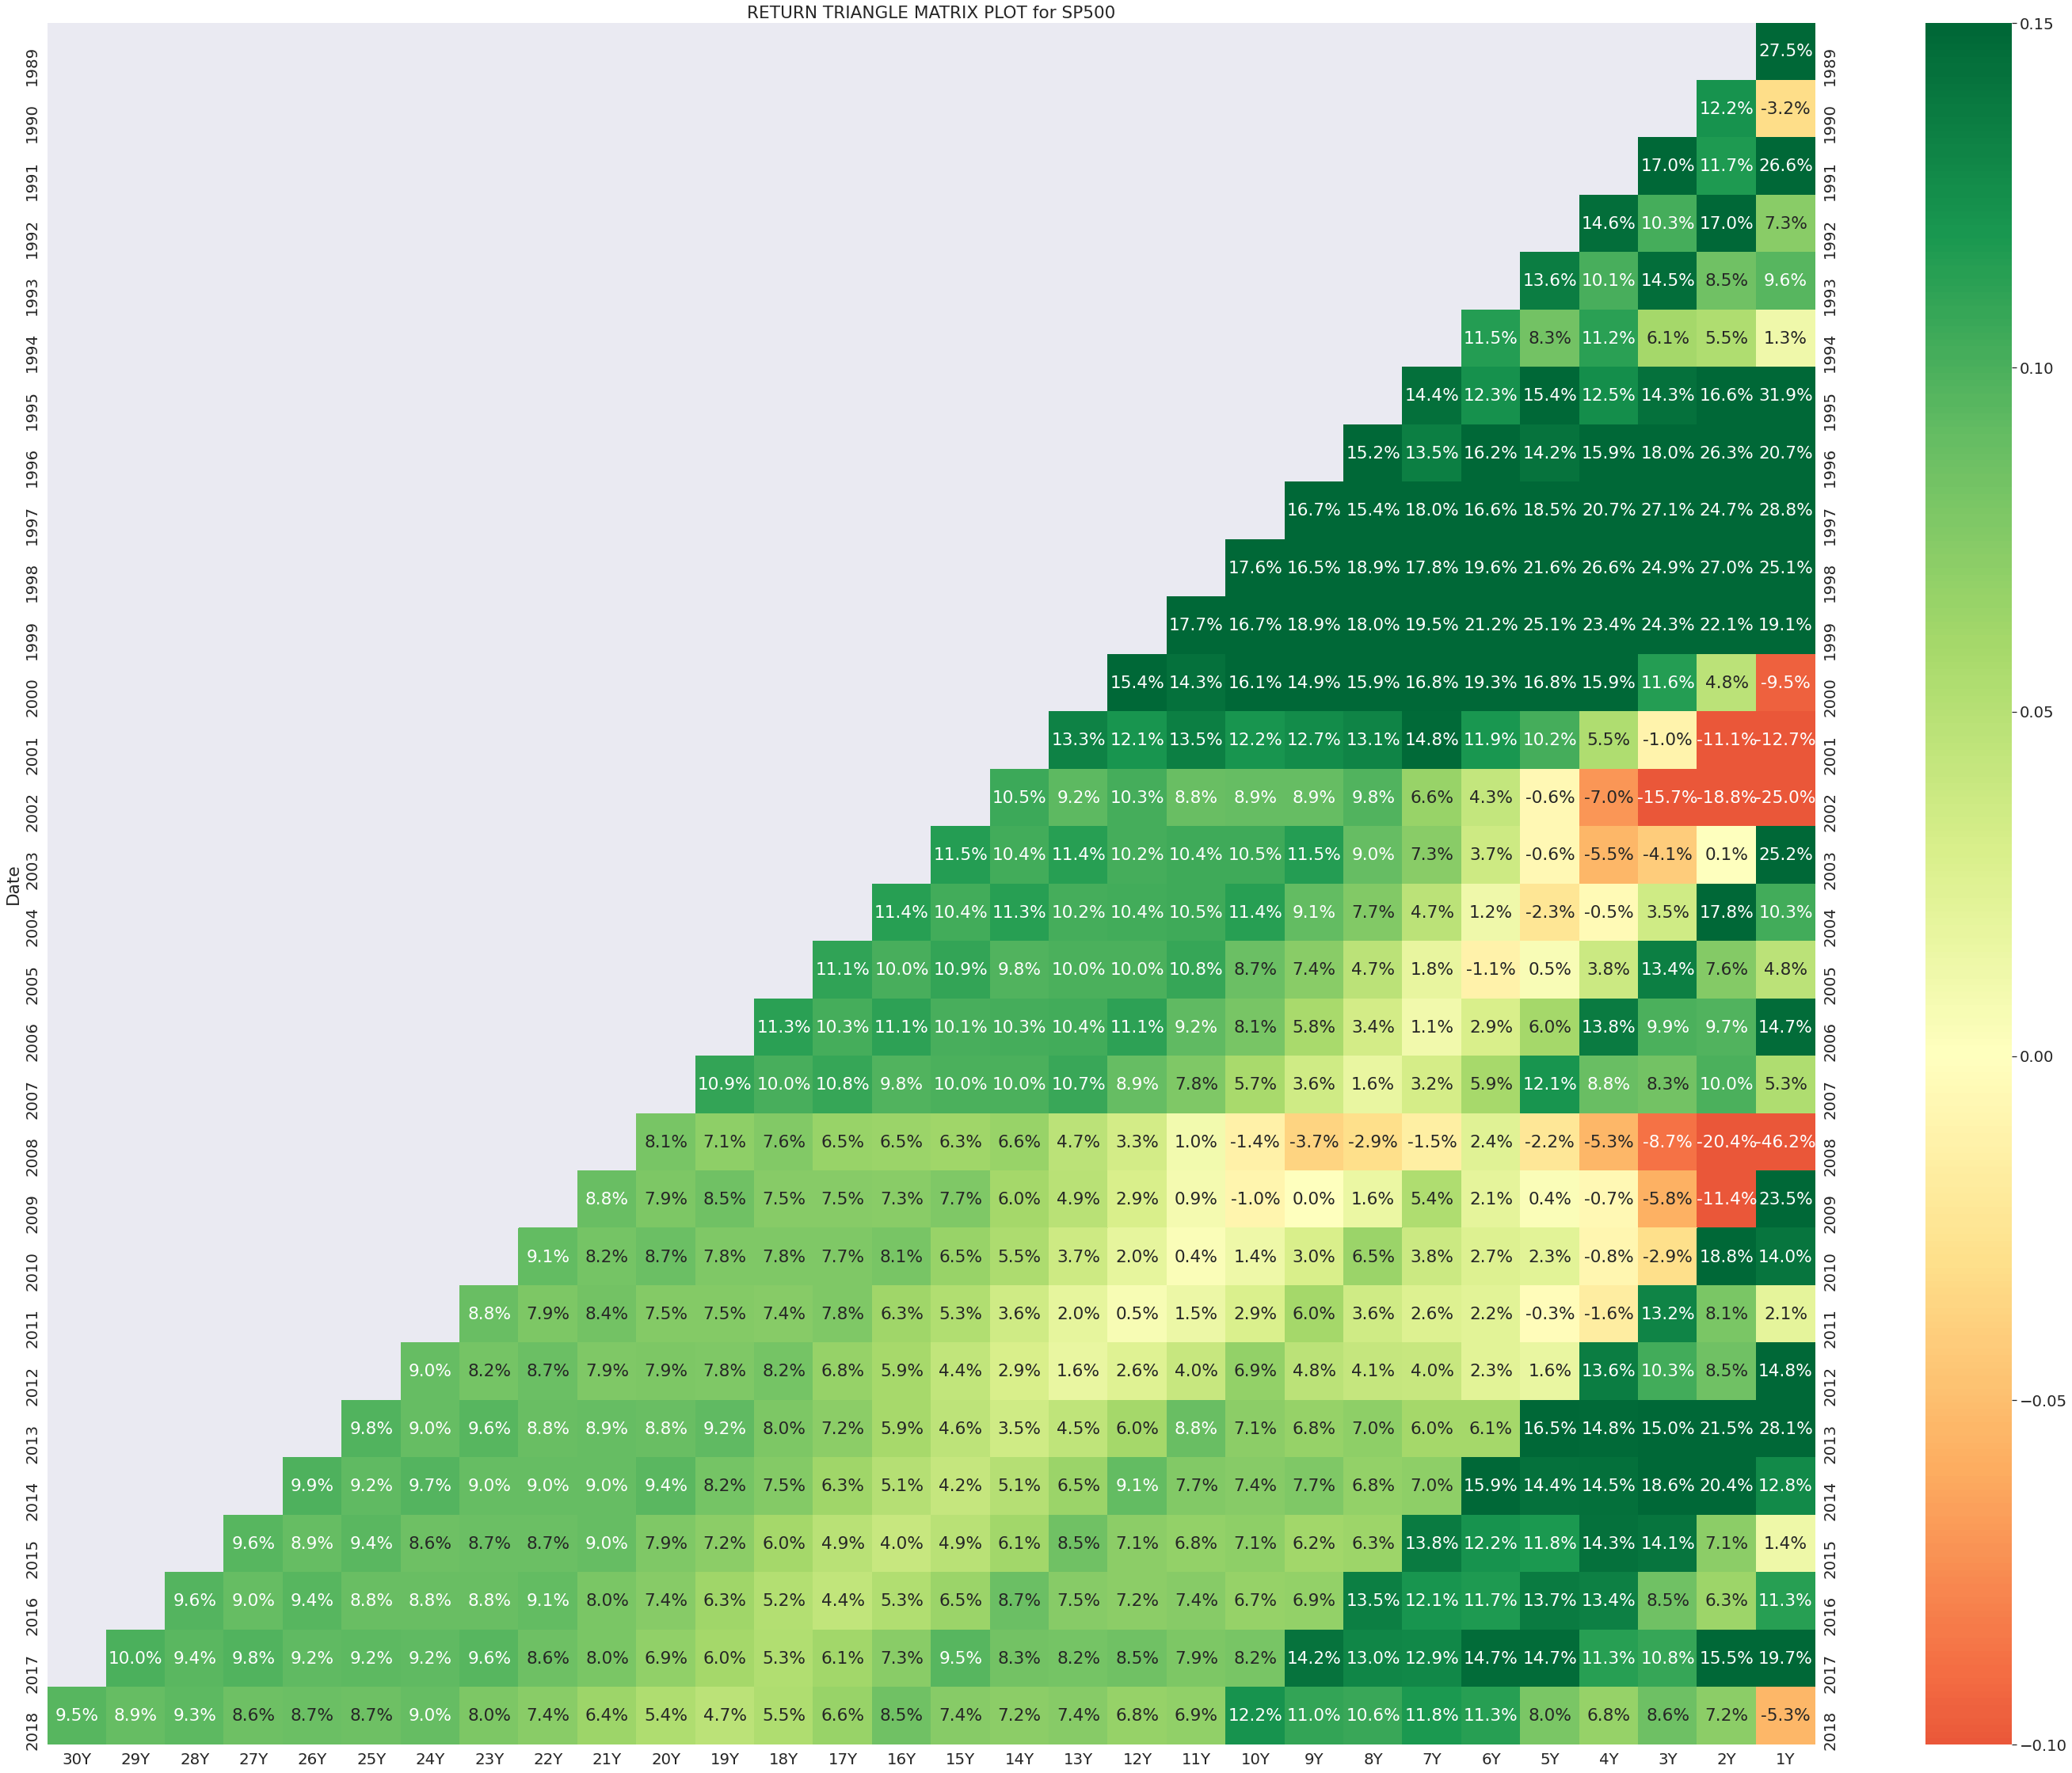

In [64]:
#creating a seaborn heat map
plt.figure(figsize=(50, 40))
sns.set(font_scale= 1.8)

sns.heatmap(triangle, annot= True, fmt= ".1%", cmap= "RdYlGn",
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright = True)
plt.title("RETURN TRIANGLE MATRIX PLOT for SP500")
plt.show()